<a href="https://colab.research.google.com/github/Daniel022de/Bootcamp_SoulCode_EngenhariaDados/blob/main/ETL/etl_study_cenipa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Extração,transformação e carregamento de dados

Esse Notebook é referente as instruções feitas pelo professor **Igor Gondim** no bootcamp **engenharia de dados** da **SoulCode** nas aulas sobre o processo de extração,transformação,carregamento de dados e análise introdutória. Foi utilizado um dataset do Centro de Investigação e Prevenção de Acidentes Aeronáuticos (CENIPA) disponível no meu [Bucket Google Cloud](https://storage.googleapis.com/bucket-pratica-s3/ocorrencia%20(1).csv) para consolidar os conhecimentos.







! **Você pode encontrar esse notebook no meu repositório** [GitHub](https://github.com/Daniel022de/Bootcamp_SoulCode_EngenhariaDados)

! **Você pode entrar em contato comigo através do meu email** ddololiveira.pessoal@gmail.com ***e*** [Linkedin](https://www.linkedin.com/in/daniel-oliveira-503b0323b/).

! **Toda dúvida,recomendações e feedbacks serão bem-vindas.**



#Instalação de biblioteca

In [41]:
pip install pandera

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Importaçao de Bibliotecas

In [42]:
import pandas as pd
import pandera as pa
import numpy as np

##Configurações do DataFrame

In [43]:
pd.set_option('display.max_columns',100)

#Extração do Dataset

In [44]:
url = 'https://storage.googleapis.com/bucket-pratica-s3/ocorrencia%20(1).csv'
df = pd.read_csv(url,sep=';',encoding='ISO-8859-1',parse_dates=['ocorrencia_dia'],dayfirst=True)

# Pré - análise

***Esse DataFrame contém informações sobre acidentes aeronáuticos***

*Informações das colunas:*

1. **"codigo_ocorrencia"** : código único para cada acidente;

**observação:** 

Os **codigo_ocorrencia1, codigo_ocorrencia2, codigo_ocorrencia3 e  codigo_ocorrencia4** são chaves de outras tabelas que possuem informações detalhadas do acidente;
2. **"ocorrencia_latitude e ocorrencia_longitude"** : informações geográficas do acidente;
3. **"ocorrencia_cidade"**: cidade onde ocorreu o acidente;
4. **"ocorrencia_uf"**: estado ondde ocorreu o acidente;
5. **"ocorrencia_pais"**: pais onde ocorreu o acidente;
6. **"ocorrencia_cidade"**: aerodromo onde ocorreu o acidente;
7. **"ocorrencia dia e ocorrencia hora"**: informações do time que ocorreu o acidente;
8. **"investigacao_aeronave_liberada,
investigacao_status, divulgacao_relatorio_numero,	divulgacao_relatorio_publicado e divulgacao_dia_publicacao"**: detalhes sobre a investigação do acidente.
9. **"total_recomendacoes**: recomendações do aerodromo;
10. **"total_aeronaves_envolvidas**: quantidade de aeronaves envolvidas no acidente;
11. **"ocorrencia_saida_pista**: Se as aeronaves chegaram a sair da pista "SIM" OU "NÃO



In [45]:
df.head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,81027,81027,81027,81027,81027,INCIDENTE GRAVE,NaN,NaN,SÃO PAULO,SP,BRASIL,SBSP,2022-10-09,16:30:00,SIM,ATIVA,A DEFINIR,NÃO,NaN,0,1,SIM
1,81030,81030,81030,81030,81030,INCIDENTE,NaN,NaN,VITÓRIA,ES,BRASIL,SBVT,2022-10-09,16:20:00,SIM,ATIVA,A DEFINIR,NÃO,NaN,0,1,NÃO
2,81023,81023,81023,81023,81023,INCIDENTE GRAVE,NaN,NaN,AMERICANA,SP,BRASIL,SDAI,2022-10-06,15:30:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,SIM
3,81029,81029,81029,81029,81029,INCIDENTE,NaN,NaN,BELO HORIZONTE,MG,BRASIL,SBBH,2022-10-06,00:44:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
4,81025,81025,81025,81025,81025,INCIDENTE,NaN,NaN,MANAUS,AM,BRASIL,SBEG,2022-10-05,20:56:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO


## Tipo dos dados

In [46]:
df.dtypes

codigo_ocorrencia                          int64
codigo_ocorrencia1                         int64
codigo_ocorrencia2                         int64
codigo_ocorrencia3                         int64
codigo_ocorrencia4                         int64
ocorrencia_classificacao                  object
ocorrencia_latitude                       object
ocorrencia_longitude                      object
ocorrencia_cidade                         object
ocorrencia_uf                             object
ocorrencia_pais                           object
ocorrencia_aerodromo                      object
ocorrencia_dia                    datetime64[ns]
ocorrencia_hora                           object
investigacao_aeronave_liberada            object
investigacao_status                       object
divulgacao_relatorio_numero               object
divulgacao_relatorio_publicado            object
divulgacao_dia_publicacao                 object
total_recomendacoes                        int64
total_aeronaves_envo

## Verificando os dados por coluna

Inconsistências encontradas:
1. Muitos dados nulos; **|>**
2. *'***'*,'**NI'   na coluna 'ocorrencia_aerodromo' |>

Solução: converter todos eles para nulo numpy **OK**

In [47]:
#Verificando quantidade dados preenchidos

df.count()

codigo_ocorrencia                 6769
codigo_ocorrencia1                6769
codigo_ocorrencia2                6769
codigo_ocorrencia3                6769
codigo_ocorrencia4                6769
ocorrencia_classificacao          6769
ocorrencia_latitude               5135
ocorrencia_longitude              5135
ocorrencia_cidade                 6769
ocorrencia_uf                     6769
ocorrencia_pais                   6769
ocorrencia_aerodromo              6769
ocorrencia_dia                    6769
ocorrencia_hora                   6767
investigacao_aeronave_liberada    6531
investigacao_status               6428
divulgacao_relatorio_numero       5987
divulgacao_relatorio_publicado    6769
divulgacao_dia_publicacao         1781
total_recomendacoes               6769
total_aeronaves_envolvidas        6769
ocorrencia_saida_pista            6769
dtype: int64

In [48]:
#verificando quantidade dados nulos

df.isna().sum()

codigo_ocorrencia                    0
codigo_ocorrencia1                   0
codigo_ocorrencia2                   0
codigo_ocorrencia3                   0
codigo_ocorrencia4                   0
ocorrencia_classificacao             0
ocorrencia_latitude               1634
ocorrencia_longitude              1634
ocorrencia_cidade                    0
ocorrencia_uf                        0
ocorrencia_pais                      0
ocorrencia_aerodromo                 0
ocorrencia_dia                       0
ocorrencia_hora                      2
investigacao_aeronave_liberada     238
investigacao_status                341
divulgacao_relatorio_numero        782
divulgacao_relatorio_publicado       0
divulgacao_dia_publicacao         4988
total_recomendacoes                  0
total_aeronaves_envolvidas           0
ocorrencia_saida_pista               0
dtype: int64

In [49]:
#Agrupando os dados para observar inconsistências

df.groupby(['ocorrencia_aerodromo'],dropna=False).size()

ocorrencia_aerodromo
***     2417
**NI     201
5JTI       1
9PAA       3
9PBS       1
        ... 
SWVZ       1
SWXQ       2
SWXV       2
SWYH       1
SWYV       1
Length: 575, dtype: int64

# Tratamento

## Backup do DataFrame

In [50]:
df_backup = df.copy()

## Renomeando colunas

In [51]:
df.rename(columns = {
  'codigo_ocorrencia':'ocorrencia',
  'ocorrencia_classificacao':'classificacao',
  'ocorrencia_cidade':'cidade',
  'ocorrencia_uf':'uf',
  'ocorrencia_pais':'pais',
  'ocorrencia_aerodromo':'aerodromo',
  'ocorrencia_dia':'dia',
  'ocorrencia_hora':'horario',
  'total_recomendacoes':'recomendacoes',
  'total_aeronaves_envolvidas':'n_aeronaves',
  'ocorrencia_saida_pista':'saida_pista'
  },inplace=True)

## Unindo coluna dia e hora

In [52]:
df['dia'] = df['dia'].astype(str)
df['data'] = pd.to_datetime((df['dia'] + ' ' + df['horario']))

In [53]:
#Organizando as colunas do DataFrame

df = df[['ocorrencia','classificacao','cidade','uf','pais','aerodromo','data','recomendacoes','n_aeronaves','saida_pista','codigo_ocorrencia1','codigo_ocorrencia2','codigo_ocorrencia3','codigo_ocorrencia4',
         'ocorrencia_latitude','ocorrencia_longitude','investigacao_aeronave_liberada','investigacao_status',
         'divulgacao_relatorio_numero','divulgacao_relatorio_publicado','divulgacao_dia_publicacao']]

##Limpeza

### Dropando colunas

***As colunas foram dropadas pois apresentam dados duplicados de outra coluna existente ou foram descartadas pelas diretrizes do negócio passada em aula.***

In [54]:
df.drop(['codigo_ocorrencia1','codigo_ocorrencia2','codigo_ocorrencia3','codigo_ocorrencia4','pais'],axis=1,inplace=True)
df.drop(['ocorrencia_latitude','ocorrencia_longitude','investigacao_aeronave_liberada','investigacao_status',
         'divulgacao_relatorio_numero','divulgacao_relatorio_publicado','divulgacao_dia_publicacao'],axis=1,inplace=True)

### Dados inconsistentes 

In [55]:
df.replace(['***','**NI','NaN'],np.NaN,inplace=True)

#Validação 

In [56]:
schema = pa.DataFrameSchema(
    columns = {
        'ocorrencia':pa.Column(pa.Int),
        'classificacao':pa.Column(pa.String),
        'cidade':pa.Column(pa.String),
        'uf':pa.Column(pa.String,pa.Check.str_length(2,2),nullable=True),
        'aerodromo':pa.Column(pa.String,pa.Check.str_length(4,4),nullable=True),
        'data':pa.Column(pa.DateTime,nullable=True),
        'recomendacoes':pa.Column(pa.Int),
        'n_aeronaves':pa.Column(pa.Int),
        'saida_pista':pa.Column(pa.String,pa.Check.str_length(3,3))
}
)

In [57]:
schema.validate(df)

,ocorrencia,classificacao,cidade,uf,aerodromo,data,recomendacoes,n_aeronaves,saida_pista
0,81027,INCIDENTE GRAVE,SÃO PAULO,SP,SBSP,2022-10-09 16:30:00,0,1,SIM
1,81030,INCIDENTE,VITÓRIA,ES,SBVT,2022-10-09 16:20:00,0,1,NÃO
2,81023,INCIDENTE GRAVE,AMERICANA,SP,SDAI,2022-10-06 15:30:00,0,1,SIM
3,81029,INCIDENTE,BELO HORIZONTE,MG,SBBH,2022-10-06 00:44:00,0,1,NÃO
4,81025,INCIDENTE,MANAUS,AM,SBEG,2022-10-05 20:56:00,0,1,NÃO
...,...,...,...,...,...,...,...,...,...
6764,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05 19:25:00,0,1,NÃO
6765,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,NaN,2010-01-04 17:30:00,0,1,NÃO
6766,40211,INCIDENTE,RIO DE JANEIRO,RJ,NaN,2010-01-03 12:00:00,0,1,NÃO
6767,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03 11:05:00,0,1,NÃO


#Carregamento para csv 

In [58]:
df.to_csv('cenipa_final.csv',index=False)

# Análise introdutória

***Para treinar:***

-Filtros

-GroupBY

-Plot (ter um insight do que está sendo passsado de dados)

In [59]:
# Quantos acidentes e incidentes ocorreram no ano de 2021 em Sao Paulo

filtro_uf = df.uf == 'SP'
filtro_ano = df.data.dt.year == 2021
filtro_class = df.classificacao.isin(['ACIDENTE','INCIDENTE']) 
df_sp = df.loc[filtro_uf & filtro_ano & filtro_class]
df_sp['classificacao'].count()

125

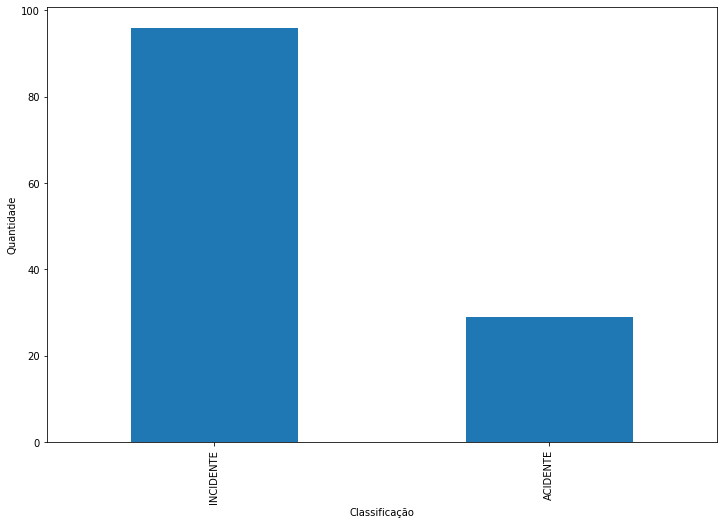

In [60]:
df_sp.groupby(['classificacao']).size().sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='Classificação',ylabel='Quantidade')